## PRIMERAS PRUEBAS DE EXTRACCION, LIMPIEZA Y GENERACION DE NUEVAS VARIABLES

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use("ggplot")

### 1. Cargamos el fichero y lo examinamos:

In [172]:
matches_2016 = pd.read_csv('../tennis_atp-master/atp_matches_2016.csv')

In [173]:
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [4]:
matches_2016.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2936,2016-M-DC-2016-WG-PO-KAZ-RUS-01,Davis Cup WG PO: KAZ vs RUS,Hard,4,D,20160916,4,105723,NaN,NaN,...,1.0,2.0,2.0,87.0,60.0,34.0,8.0,11.0,7.0,13.0
2937,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,1,104797,NaN,NaN,...,1.0,4.0,3.0,88.0,53.0,35.0,14.0,13.0,4.0,8.0
2938,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,2,105967,NaN,NaN,...,3.0,3.0,1.0,107.0,73.0,36.0,18.0,12.0,10.0,16.0
2939,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,4,104797,NaN,NaN,...,8.0,3.0,6.0,169.0,103.0,70.0,34.0,24.0,2.0,7.0
2940,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,5,134472,NaN,NaN,...,8.0,8.0,3.0,114.0,63.0,39.0,26.0,19.0,6.0,14.0


In [174]:
pd.set_option('display.max_columns', None)

In [6]:
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [7]:
matches_2016.columns

Index([u'tourney_id', u'tourney_name', u'surface', u'draw_size',
       u'tourney_level', u'tourney_date', u'match_num', u'winner_id',
       u'winner_seed', u'winner_entry', u'winner_name', u'winner_hand',
       u'winner_ht', u'winner_ioc', u'winner_age', u'winner_rank',
       u'winner_rank_points', u'loser_id', u'loser_seed', u'loser_entry',
       u'loser_name', u'loser_hand', u'loser_ht', u'loser_ioc', u'loser_age',
       u'loser_rank', u'loser_rank_points', u'score', u'best_of', u'round',
       u'minutes', u'w_ace', u'w_df', u'w_svpt', u'w_1stIn', u'w_1stWon',
       u'w_2ndWon', u'w_SvGms', u'w_bpSaved', u'w_bpFaced', u'l_ace', u'l_df',
       u'l_svpt', u'l_1stIn', u'l_1stWon', u'l_2ndWon', u'l_SvGms',
       u'l_bpSaved', u'l_bpFaced'],
      dtype='object')

In [8]:
matches_2016.shape

(2941, 49)

In [9]:
matches_2016['surface'].describe()

count     2941
unique       4
top       Hard
freq      1717
Name: surface, dtype: object

In [10]:
matches_2016['tourney_name'].describe()

count        2941
unique        133
top       Us Open
freq          127
Name: tourney_name, dtype: object

#### Viendo el tail y analizando surface y tourney_name (campos que sabemos no tienen Nans), sabemos que el data set tiene unas
#### dimensiones de 49 x 2941

### Elegimos una variable para hacer un estudio:

In [11]:
ht = matches_2016['winner_ht']

In [12]:
ht.dtype

dtype('float64')

In [13]:
ht.describe()

count    2179.000000
mean      186.867370
std         7.931892
min       163.000000
25%       183.000000
50%       188.000000
75%       190.000000
max       208.000000
Name: winner_ht, dtype: float64

#### Por tanto sabemos que hay 762 NaN, diferencia entre los 2941 partidos y los 2179 con valor (count no tiene en cuenta Nans)

In [14]:
ht.sample(10)

2274    163.0
1362    175.0
1861    188.0
2663      NaN
2133    188.0
30      183.0
2400    163.0
1039    178.0
2377      NaN
2529      NaN
Name: winner_ht, dtype: float64

#### Ahora vamos a seleccionar todos aquellos que tengan Nan en winner_ht:

In [15]:
matches_2016[matches_2016['winner_ht'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0
10,2016-M020,Brisbane,Hard,32,A,20160104,290,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,106045,NaN,NaN,Denis Kudla,R,180.0,USA,23.381246,69.0,719.0,6-3 6-2,3,R16,56.0,7.0,1.0,45.0,33.0,28.0,8.0,9.0,0.0,0.0,0.0,2.0,48.0,27.0,19.0,8.0,8.0,2.0,5.0
11,2016-M020,Brisbane,Hard,32,A,20160104,289,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,7-6(5) 4-6 6-3,3,R16,122.0,13.0,4.0,106.0,57.0,45.0,24.0,15.0,9.0,11.0,9.0,1.0,92.0,50.0,40.0,20.0,16.0,1.0,4.0
18,2016-M020,Brisbane,Hard,32,A,20160104,280,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.627652,51.0,817.0,105032,NaN,NaN,Samuel Groth,R,NaN,AUS,28.210815,60.0,782.0,7-6(8) 6-4,3,R32,102.0,2.0,3.0,73.0,48.0,35.0,14.0,11.0,2.0,4.0,11.0,3.0,84.0,52.0,39.0,10.0,11.0,8.0,11.0
20,2016-M020,Brisbane,Hard,32,A,20160104,278,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105902,NaN,WC,James Duckworth,R,183.0,AUS,23.953457,120.0,485.0,3-6 6-4 6-3,3,R32,113.0,4.0,2.0,80.0,48.0,35.0,21.0,14.0,2.0,4.0,14.0,1.0,93.0,42.0,32.0,26.0,14.0,6.0,9.0


In [16]:
df.groupby??

Object `df.groupby` not found.


In [24]:
# Quiero agruparlos pero no funciona. Voy a probar con unique
ht_Nan = matches_2016[matches_2016['winner_ht'].isnull()].groupby('winner_name')

In [30]:
# Por que si no hago groupby me da otro formato? Prueba a hacer con groupby y sin groupby
## ht_Nan = matches_2016[matches_2016['winner_ht'].isnull()]

In [25]:
ht_Nan.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0
10,2016-M020,Brisbane,Hard,32,A,20160104,290,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,106045,NaN,NaN,Denis Kudla,R,180.0,USA,23.381246,69.0,719.0,6-3 6-2,3,R16,56.0,7.0,1.0,45.0,33.0,28.0,8.0,9.0,0.0,0.0,0.0,2.0,48.0,27.0,19.0,8.0,8.0,2.0,5.0
11,2016-M020,Brisbane,Hard,32,A,20160104,289,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,7-6(5) 4-6 6-3,3,R16,122.0,13.0,4.0,106.0,57.0,45.0,24.0,15.0,9.0,11.0,9.0,1.0,92.0,50.0,40.0,20.0,16.0,1.0,4.0
18,2016-M020,Brisbane,Hard,32,A,20160104,280,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.627652,51.0,817.0,105032,NaN,NaN,Samuel Groth,R,NaN,AUS,28.210815,60.0,782.0,7-6(8) 6-4,3,R32,102.0,2.0,3.0,73.0,48.0,35.0,14.0,11.0,2.0,4.0,11.0,3.0,84.0,52.0,39.0,10.0,11.0,8.0,11.0
20,2016-M020,Brisbane,Hard,32,A,20160104,278,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105902,NaN,WC,James Duckworth,R,183.0,AUS,23.953457,120.0,485.0,3-6 6-4 6-3,3,R32,113.0,4.0,2.0,80.0,48.0,35.0,21.0,14.0,2.0,4.0,14.0,1.0,93.0,42.0,32.0,26.0,14.0,6.0,9.0
22,2016-M020,Brisbane,Hard,32,A,20160104,276,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,106415,NaN,Q,Yoshihito Nishioka,L,NaN,JPN,20.271047,117.0,495.0,4-6 6-3 7-5,3,R32,143.0,17.0,2.0,95.0,64.0,53.0,15.0,16.0,2.0,4.0,4.0,3.0,120.0,64.0,42.0,30.0,15.0,12.0,15.0
29,2016-0891,Chennai,Hard,32,A,20160104,298,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105379,NaN,NaN,Aljaz Bedene,R,181.0,GBR,26.464066,45.0,939.0,7-6(5) 6-7(5) 6-3,3,SF,176.0,17.0,1.0,134.0,92.0,66.0,20.0,17.0,8.0,11.0,16.0,0.0,106.0,73.0,52.0,17.0,16.0,9.0,13.0
32,2016-0891,Chennai,Hard,32,A,20160104,295,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105138,4.0,NaN,Roberto Bautista Agut,R,NaN,ESP,27.723477,25.0,1480.0,3-6 6-4 7-6(1),3,QF,150.0,9.0,2.0,97.0,60.0,43.0,21.0,15.0,5.0,8.0,10.0,5.0,113.0,77.0,52.0,15.0,16.0,3.0,6.0
37,2016-0891,Chennai,Hard,32,A,20160104,290,105341,NaN,Q,Thomas Fabbiano,R,NaN,ITA,26.609172,157.0,362.0,104180,6.0,NaN,Gilles Muller,L,193.0,LUX,32.657084,38.0,1105.0,6-4 7-5,3,R16,77.0,0.0,2.0,61.0,43.0,31.0,9.0,11.0,1.0,3.0,14.0,5.0,56.0,38.0,30.0,6.0,11.0,2.0,6.0
38,2016-0891,Chennai,Hard,32,A,20160104,289,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105572,NaN,NaN,Austin Krajicek,L,NaN,USA,25.552361,104.0,559.0,6-2 7-5,3,R16,90.0,3.0,1.0,53.0,30.0,24.0,19.0,10.0,1.0,1.0,4.0,1.0,69.0,44.0,27.0,13.0,10.0,7.0,10.0


In [26]:
ht_Nan['winner_name'].unique()

winner_name
Adam Pavlasek                            [Adam Pavlasek]
Alexandar Lazarov                    [Alexandar Lazarov]
Alexander Bublik                      [Alexander Bublik]
Alexander Sarkissian              [Alexander Sarkissian]
Alexander Zverev                      [Alexander Zverev]
Alexandre Sidorenko                [Alexandre Sidorenko]
Andrea Arnaboldi                      [Andrea Arnaboldi]
Andrew Whittington                  [Andrew Whittington]
Andrey Rublev                            [Andrey Rublev]
Ante Pavic                                  [Ante Pavic]
Antoine Bellier                        [Antoine Bellier]
Austin Krajicek                        [Austin Krajicek]
Benjamin Hannestad                  [Benjamin Hannestad]
Bjorn Fratangelo                      [Bjorn Fratangelo]
Blaz Rola                                    [Blaz Rola]
Borna Coric                                [Borna Coric]
Calvin Hemery                            [Calvin Hemery]
Carl Soderlund     

In [27]:
ht_Nan['winner_name'].unique().count()

146

#### Hay 146 jugadores. Podemos intentar cruzarlo con otros sets para completar su altura.

### Lo primero que haremos sera comprobar la calidad de los datos: Nans, outliers, etc.

#### Vamos a quitar los Nans del data set

In [31]:
ht2 = ht[np.logical_not(np.isnan(ht))]

In [32]:
ht2.describe()

count    2179.000000
mean      186.867370
std         7.931892
min       163.000000
25%       183.000000
50%       188.000000
75%       190.000000
max       208.000000
Name: winner_ht, dtype: float64

In [33]:
ht2.sample(10)

2592    178.0
2166    175.0
2638    185.0
2564    183.0
637     185.0
2656    183.0
685     190.0
2390    175.0
1322    208.0
1693    185.0
Name: winner_ht, dtype: float64

In [34]:
ht.nlargest()

1015    208.0
1022    208.0
1288    208.0
1322    208.0
1359    208.0
Name: winner_ht, dtype: float64

In [35]:
matches_2016[matches_2016['winner_ht'] == 208.0].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1015,2016-7163,Istanbul,Clay,32,A,20160425,295,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.155373,31.0,1235.0,104719,5.0,NaN,Marcel Granollers,R,190.0,ESP,30.036961,54.0,871.0,7-6(2) 6-7(5) 6-4,3,QF,133.0,20.0,1.0,103.0,82.0,64.0,13.0,17.0,1.0,1.0,8.0,0.0,89.0,71.0,56.0,16.0,17.0,0.0,1.0
1022,2016-7163,Istanbul,Clay,32,A,20160425,288,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.155373,31.0,1235.0,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,25.820671,69.0,748.0,7-6(11) 7-6(7),3,R16,107.0,13.0,3.0,82.0,52.0,47.0,21.0,12.0,2.0,2.0,11.0,1.0,85.0,65.0,56.0,12.0,12.0,0.0,0.0
1288,2016-520,Roland Garros,Clay,128,G,20160523,160,103333,27.0,NaN,Ivo Karlovic,R,208.0,CRO,37.232033,28.0,1280.0,103656,NaN,NaN,Albert Montanes,R,175.0,ESP,35.488022,98.0,592.0,6-2 7-6(7) 7-6(5),5,R128,108.0,31.0,3.0,93.0,60.0,59.0,19.0,16.0,1.0,2.0,3.0,3.0,104.0,77.0,56.0,15.0,16.0,3.0,6.0
1322,2016-520,Roland Garros,Clay,128,G,20160523,194,103333,27.0,NaN,Ivo Karlovic,R,208.0,CRO,37.232033,28.0,1280.0,111442,NaN,NaN,Jordan Thompson,R,NaN,AUS,22.091718,94.0,608.0,6-7(2) 6-3 7-6(3) 6-7(4) 12-10,5,R64,271.0,41.0,10.0,217.0,145.0,120.0,36.0,34.0,9.0,10.0,12.0,4.0,204.0,132.0,108.0,37.0,33.0,8.0,11.0
1359,2016-M010,s-Hertogenbosch,Grass,32,A,20160606,296,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.270363,28.0,1360.0,105173,NaN,NaN,Adrian Mannarino,L,183.0,FRA,27.937029,55.0,860.0,6-3 6-4,3,QF,62.0,22.0,4.0,54.0,36.0,33.0,11.0,10.0,3.0,3.0,4.0,5.0,54.0,30.0,24.0,10.0,9.0,4.0,6.0


In [36]:
ht.nsmallest()

21     163.0
162    163.0
214    163.0
240    163.0
476    163.0
Name: winner_ht, dtype: float64

In [37]:
matches_2016.loc[matches_2016['winner_ht'] == 163.0]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
21,2016-M020,Brisbane,Hard,32,A,20160104,277,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,105064,NaN,NaN,Thomaz Bellucci,L,188.0,BRA,28.013689,37.0,1105.0,6-4 6-4,3,R32,82.0,3.0,4.0,57.0,30.0,23.0,16.0,10.0,1.0,2.0,7.0,2.0,66.0,40.0,25.0,15.0,10.0,7.0,10.0
162,2016-580,Australian Open,Hard,128,G,20160118,123,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,104660,NaN,NaN,Sergiy Stakhovsky,R,193.0,UKR,30.031485,60.0,780.0,3-6 6-3 6-4 6-4,5,R128,156.0,3.0,5.0,115.0,74.0,54.0,18.0,19.0,5.0,10.0,10.0,6.0,123.0,69.0,46.0,24.0,19.0,8.0,15.0
214,2016-580,Australian Open,Hard,128,G,20160118,175,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,106000,NaN,NaN,Damir Dzumhur,R,172.0,BIH,23.663244,81.0,661.0,6-4 0-6 6-4 6-2,5,R64,157.0,7.0,3.0,110.0,63.0,38.0,20.0,17.0,7.0,15.0,3.0,2.0,116.0,71.0,38.0,19.0,17.0,7.0,16.0
240,2016-580,Australian Open,Hard,128,G,20160118,201,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,106233,19.0,NaN,Dominic Thiem,R,NaN,AUT,22.373717,20.0,1645.0,6-1 3-6 7-6 7-5,5,R32,178.0,6.0,8.0,141.0,81.0,62.0,28.0,21.0,9.0,13.0,17.0,6.0,129.0,75.0,50.0,27.0,20.0,6.0,12.0
476,2016-0496,Marseille,Hard,32,A,20160215,287,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.190965,17.0,1970.0,104999,NaN,Q,Mischa Zverev,L,190.0,GER,28.484600,175.0,314.0,6-1 2-0 RET,3,R16,37.0,2.0,0.0,29.0,23.0,17.0,3.0,4.0,3.0,3.0,0.0,1.0,31.0,21.0,9.0,3.0,5.0,3.0,7.0
487,2016-0496,Marseille,Hard,32,A,20160215,273,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.190965,17.0,1970.0,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.742642,69.0,735.0,6-3 6-1,3,R32,61.0,2.0,0.0,38.0,25.0,22.0,11.0,8.0,1.0,1.0,0.0,2.0,60.0,39.0,20.0,12.0,8.0,4.0,8.0
615,2016-M006,Indian Wells Masters,Hard,128,M,20160307,314,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,105227,10.0,NaN,Marin Cilic,R,198.0,CRO,27.438741,12.0,2555.0,7-6(4) 6-2,3,QF,97.0,7.0,5.0,83.0,52.0,39.0,14.0,10.0,11.0,12.0,10.0,1.0,70.0,39.0,24.0,16.0,10.0,3.0,6.0
618,2016-M006,Indian Wells Masters,Hard,128,M,20160307,311,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,104527,3.0,NaN,Stanislas Wawrinka,R,183.0,SUI,30.943190,4.0,6325.0,6-3 5-7 7-6(5),3,R16,145.0,2.0,5.0,109.0,71.0,43.0,19.0,16.0,9.0,15.0,6.0,5.0,107.0,60.0,40.0,20.0,17.0,4.0,11.0
639,2016-M006,Indian Wells Masters,Hard,128,M,20160307,290,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,105550,NaN,NaN,Guido Pella,L,NaN,ARG,25.806982,40.0,1018.0,4-6 6-3 6-2,3,R32,130.0,4.0,3.0,90.0,53.0,43.0,17.0,14.0,6.0,8.0,7.0,10.0,106.0,65.0,40.0,19.0,13.0,14.0,18.0
661,2016-M006,Indian Wells Masters,Hard,128,M,20160307,268,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,126207,NaN,WC,Francis Tiafoe,R,NaN,USA,18.127310,177.0,309.0,3-6 6-3 7-6(2),3,R64,134.0,4.0,5.0,103.0,59.0,42.0,24.0,15.0,7.0,10.0,7.0,4.0,97.0,54.0,39.0,19.0,15.0,8.0,11.0


### Una de las comprobaciones que debemos hacer es si la variables siguen una distribucion normal:

<function matplotlib.pyplot.show>

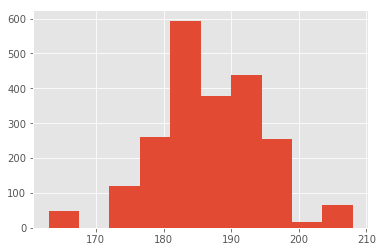

In [38]:
plt.hist(ht2)
plt.show

#### Parece una distribucion mas o menos normal

In [39]:
ht2.mean(),ht2.std()

(186.8673703533731, 7.9318918416343305)

#### Vamos a probar a Estandarizar la variable ( Xe = (x - x^) / std

In [42]:
# En pandas no existe reduce, por tanto utilizaremos apply
# count = ht2.reduce(lambda x,y: x+y)
# mean = ht2.reduce(lambda x,y: x+y)/count

AttributeError: 'Series' object has no attribute 'reduce'

In [41]:
ht2_mean = ht2.mean()
ht2_std = ht2.std() 
ht2_estandar = ht2.apply(lambda x: (x - ht2_mean)/ht2_std)

<function matplotlib.pyplot.show>

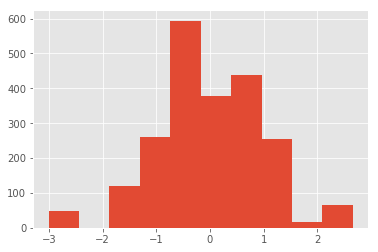

In [43]:
plt.hist(ht2_estandar)
plt.show

#### La mayor parte de los valores esta entre la media y 2 std por tanto dentro del intervalo de confianza del 95%

### Vamos a hacer una prueba de la relacion entre dos variables:

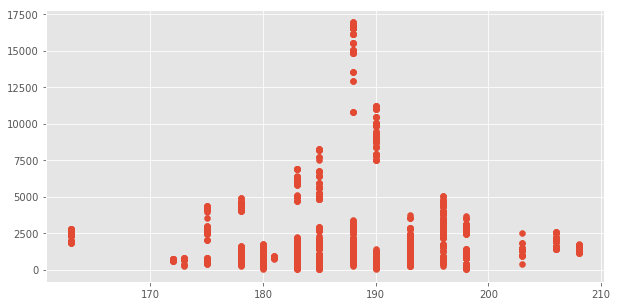

In [21]:
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(matches_2016['winner_ht'], matches_2016['winner_rank_points'])

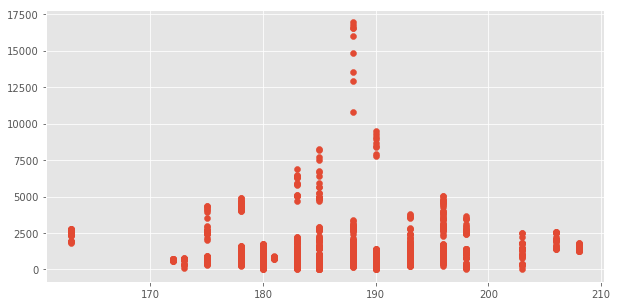

In [22]:
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(matches_2016['loser_ht'], matches_2016['loser_rank_points'])

### Vamos a seguir los pasos con otra variable

In [44]:
age = matches_2016['winner_age']
age.dtype
age.describe()

count    2935.000000
mean       27.957526
std         4.213122
min        17.188227
25%        25.267625
50%        28.249144
75%        30.888433
max        37.850787
Name: winner_age, dtype: float64

#### Hay 6 NaNs

In [50]:
matches_2016[matches_2016['winner_age'].isnull()].head(6)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2762,2016-M-DC-2016-G2-AM-M-PER-MEX,Davis Cup G2 R2: PER vs MEX,Clay,4,D,20160715,2,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106412,NaN,NaN,Lucas Gomez,U,NaN,MEX,20.917180,530.0,66.0,6-3 6-4 6-3,5,RR,114.0,8.0,2.0,73.0,50.0,41.0,15.0,14.0,3.0,4.0,4.0,3.0,79.0,44.0,31.0,17.0,14.0,4.0,9.0
2764,2016-M-DC-2016-G2-AM-M-PER-MEX,Davis Cup G2 R2: PER vs MEX,Clay,4,D,20160715,5,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106250,NaN,NaN,Luis Patino,R,NaN,MEX,22.762491,780.0,25.0,6-4 6-7(2) 6-3,3,RR,169.0,3.0,2.0,106.0,69.0,39.0,26.0,16.0,11.0,13.0,1.0,3.0,116.0,65.0,34.0,32.0,15.0,10.0,15.0
2766,2016-M-DC-2016-G2-AM-M-PER-VEN-01,Davis Cup G2 R3: PER vs VEN,Clay,4,D,20160916,2,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106175,NaN,NaN,Ricardo Rodriguez,R,NaN,VEN,23.375770,686.0,36.0,6-4 6-2 6-0,5,RR,135.0,5.0,3.0,74.0,47.0,36.0,15.0,12.0,6.0,8.0,0.0,1.0,82.0,64.0,29.0,6.0,12.0,3.0,11.0
2768,2016-M-DC-2016-G2-AM-M-PER-VEN-01,Davis Cup G2 R3: PER vs VEN,Clay,4,D,20160916,5,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,105334,NaN,NaN,Luis David Martinez,U,NaN,VEN,27.337440,740.0,29.0,4-6 6-4 7-6(2) 6-1,5,RR,NaN,11.0,4.0,154.0,100.0,68.0,27.0,20.0,12.0,14.0,8.0,4.0,117.0,67.0,42.0,29.0,19.0,3.0,8.0
2769,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,1,200619,NaN,NaN,Sebastian Arcila,NaN,NaN,PUR,NaN,NaN,NaN,108763,NaN,NaN,Alberto Emmanuel Alvarado Larin,U,NaN,ESA,21.245722,NaN,NaN,6-4 6-4 6-2,3,RR,108.0,0.0,3.0,80.0,61.0,44.0,11.0,14.0,4.0,6.0,1.0,7.0,107.0,67.0,36.0,20.0,14.0,7.0,13.0
2772,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,5,200620,NaN,NaN,Ignacio Garcia,NaN,NaN,PUR,NaN,NaN,NaN,144771,NaN,NaN,Sebastian Quiros,NaN,NaN,ESA,17.949350,1774.0,1.0,6-1 6-2,3,RR,62.0,2.0,4.0,50.0,25.0,17.0,18.0,8.0,5.0,5.0,4.0,4.0,52.0,26.0,17.0,5.0,7.0,5.0,10.0


#### Aqui no va a hacer falta hacer un groupby para saber cuantos jugadores distintos. Son todos partidos de Davies, deberiamos comprobar la calidad de estos partidos. Dado que no es una competicion individual, sino por paises probablemente la saquemos del estudio.

#### Vamos a quitar los NaNs del dataset antes de examinarlo:

In [52]:
age2 = age[np.logical_not(np.isnan(age))]

In [56]:
age2.describe()

count    2935.000000
mean       27.957526
std         4.213122
min        17.188227
25%        25.267625
50%        28.249144
75%        30.888433
max        37.850787
Name: winner_age, dtype: float64

<function matplotlib.pyplot.show>

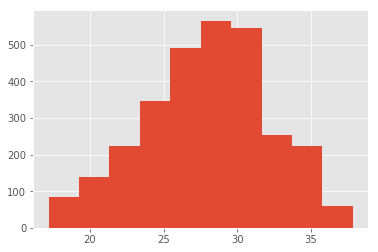

In [53]:
plt.hist(age2)
plt.show

In [55]:
(age2.mean(),age2.std())

(27.957525533256245, 4.213121906556134)

#### Evidentemente la distribución no es totalmente normal. A partir de una edad el rendimiento de los tenistas disminuye bruscamente y se retiran. La entrada de nuevos tenistas es mucho más escalonada

#### Estandarizamos:

In [57]:
age2_mean = age2.mean()
age2_std = age2.std() 
age2_estandar = age2.apply(lambda x: (x - age2_mean)/age2_std)

<function matplotlib.pyplot.show>

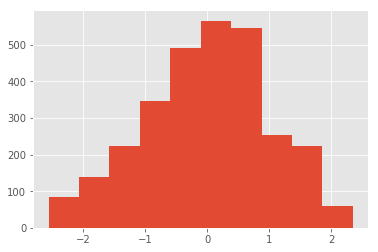

In [58]:
plt.hist(age2_estandar)
plt.show

## Ahora vamos a construir nuevas variables:

In [114]:
score = matches_2016['score']

In [115]:
score.head()

0           6-4 6-4
1           6-1 6-4
2     7-6(5) 7-6(5)
3    6-4 6-7(4) 6-4
4    2-6 7-6(4) 6-4
Name: score, dtype: object

In [61]:
score.dtype

dtype('O')

#### El dtype 'O' significa que los elementos son de varios tipos. Debería convertir todos a str y separalo

#### Prueba 1:

In [63]:
new_score = score.apply(lambda x: x.split(' '))

In [64]:
new_score.head()

0            [6-4, 6-4]
1            [6-1, 6-4]
2      [7-6(5), 7-6(5)]
3    [6-4, 6-7(4), 6-4]
4    [2-6, 7-6(4), 6-4]
Name: score, dtype: object

In [119]:
new_score.dtype

dtype('O')

In [80]:
new_score.iloc[0]

['6-4', '6-4']

In [81]:
new_score.iloc[0][0]

'6-4'

In [97]:
new_score.iloc[2][1]

'7-6(5)'

In [82]:
## Es una lista de listas.

In [99]:
new_score['s1_w'] = new_score.apply(lambda x: x[0][0])
new_score['s1_w'].head()

0    6
1    6
2    7
3    6
4    2
Name: score, dtype: object

In [103]:
# Esto no funciona. No utilizar, busco otro metodo
new_score['s1_L'] = new_score.apply(lambda x: x[0][1])
new_score['s1_L'].head()

IndexError: string index out of range

#### Prueba 2:

In [125]:
score_str = score.astype(str)

In [126]:
score_str.head()

0           6-4 6-4
1           6-1 6-4
2     7-6(5) 7-6(5)
3    6-4 6-7(4) 6-4
4    2-6 7-6(4) 6-4
Name: score, dtype: object

In [133]:
score_str[0][0], score_str[0][1], score_str[0][2], score_str[0][3], score_str[0][4], score_str[0][5], score_str[0][6]

('6', '-', '4', ' ', '6', '-', '4')

In [134]:
score_str[2][0], score_str[2][1], score_str[2][2], score_str[2][3], score_str[2][4], score_str[2][5], score_str[2][6]

('7', '-', '6', '(', '5', ')', ' ')

In [154]:
score_str.str.split(' ')[2][0]

'7-6(5)'

##### PRUEBA 3. OK!

In [175]:
matches_2016['s1'], matches_2016['sResto'] = matches_2016['score'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,6-4
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,6-4
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),7-6(5)
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,6-7(4) 6-4
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,7-6(4) 6-4


In [176]:
matches_2016['s2'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5)
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,6-4,6-7(4)
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,6-4,7-6(4)


In [177]:
matches_2016['s3'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4


##### Los Grand Slam tienen 5 sets, pot tanto hay que separar hasta 5 sets. Despues habra que dividir cad uno en 2, los juegos del ganador y del perdedor.

In [180]:
matches_2016.shape

(2941, 53)

In [178]:
matches_2016['sResto'].describe()

count     382
unique    103
top       6-4
freq       48
Name: sResto, dtype: object

In [181]:
matches_2016['s4'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3,s4
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN


In [182]:
matches_2016['sResto'].describe()

count     135
unique     24
top       6-4
freq       31
Name: sResto, dtype: object

In [183]:
matches_2016['s5'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3,s4,s5
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN,NaN


In [184]:
matches_2016['sResto'].describe()

count       4
unique      1
top       RET
freq        4
Name: sResto, dtype: object

#### ¿Por qué cuenta 4?